# Precprocessing Data


In [10]:
#!pip3 install  nltk

In [11]:
import pandas as pd
import numpy as np
import re
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
data = pd.read_csv("Toxic-Comment-Classification-Challenge-master/data/train.csv")
data
test = pd.read_csv("Toxic-Comment-Classification-Challenge-master/data/test.csv")
test_labels = pd.read_csv("Toxic-Comment-Classification-Challenge-master/data/test_labels.csv")

In [13]:
data.shape,test.shape

((159571, 8), (153164, 2))

In [14]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [15]:
test_labels.head(5)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [17]:
test_without_id = test.drop("id",axis=1)
tes_labels_without = test_labels.drop("id",axis=1)
data_without_id = data.drop("id",axis=1)
data_without_id

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [18]:
columns = list(data_without_id.columns)
columns

['comment_text',
 'toxic',
 'severe_toxic',
 'obscene',
 'threat',
 'insult',
 'identity_hate']

In [19]:
dataWCI = data_without_id.drop("comment_text",axis=1)
dataWCI

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


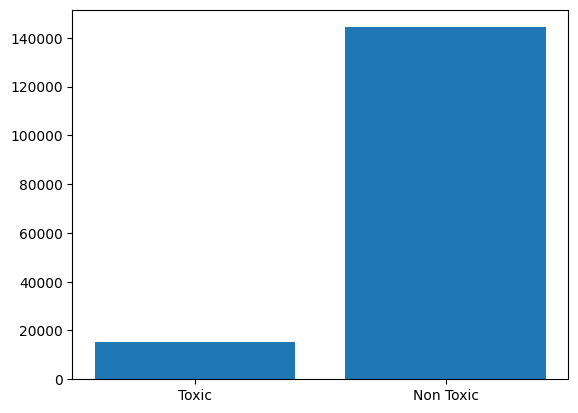

In [20]:
count_toxic = sum(dataWCI["toxic"]==1)
count_ntoxic = sum(dataWCI["toxic"]==0)
plt.bar(x=["Toxic","Non Toxic"],height=[count_toxic,count_ntoxic])
plt.show()

In [21]:
count_toxic, count_ntoxic

(15294, 144277)

The bar graph above shows that the frequency of non toxic comments are way higher than the toxic comment which will greatly affect the performance of the model.

In [22]:
variable_names = ['data','data_without_id','dataWCI']

In [23]:
x = columns[2:]
x

['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [24]:
ToxicDataWCI = dataWCI[dataWCI["toxic"]==1]
ToxicDataWCI

,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,1,1,1,0,1,0
12,1,0,0,0,0,0
16,1,0,0,0,0,0
42,1,0,1,0,1,1
43,1,0,1,0,1,0
...,...,...,...,...,...,...
159494,1,0,1,0,1,1
159514,1,0,0,0,1,0
159541,1,0,1,0,1,0
159546,1,0,0,0,1,0


In [25]:
nonToxicDataWCI = dataWCI[dataWCI["toxic"]==0]
nonToxicDataWCI

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [26]:
total_freq = []
for col in x:
    total_freq.append(sum(dataWCI[f"{col}"]==1))
total_freq

[1595, 8449, 478, 7877, 1405]

In [27]:
non_toxic_freq=[]
for col in x:
    non_toxic_freq.append(sum(nonToxicDataWCI[f"{col}"]==1))
non_toxic_freq

[0, 523, 29, 533, 103]

In [28]:
toxic_freq=[]
for col in x:
    toxic_freq.append(sum(ToxicDataWCI[f"{col}"]==1))
toxic_freq

[1595, 7926, 449, 7344, 1302]

In [29]:
"""
These variables are just modify the locations of the bar graph
"""
r1 = np.arange(len(total_freq))
r2 = [x + 0.25 for x in r1]
r3 = [x+0.5 for x in r1]

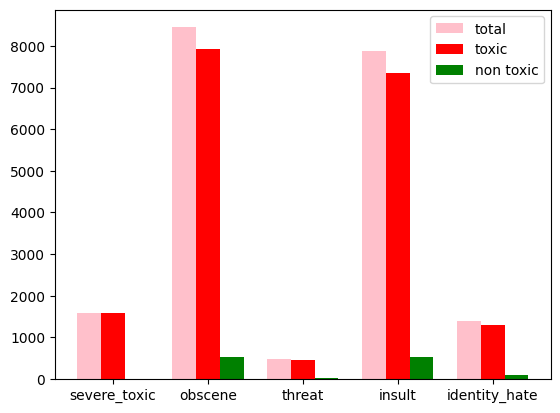

In [30]:
plt.bar(r1,total_freq,color="pink",label='total',width=0.25)
plt.bar(r2,toxic_freq,color="red",label='toxic',width=0.25)
plt.bar(r3,non_toxic_freq,color="green",label='non toxic',width=0.25)
plt.xticks([r + 0.25 for r in range(len(total_freq))], x)
plt.legend()
plt.show()

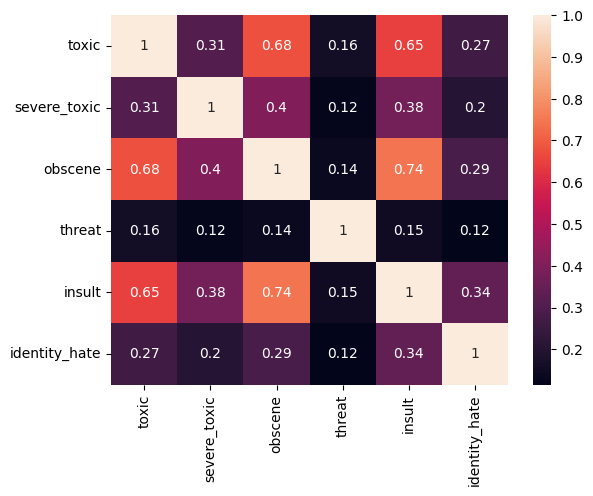

In [31]:
correlation_matrix = dataWCI.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()

We can conclude from the correlation matrix above that whenever the comment is identified as obscene or insult, it has a high probablity that the comment is toxic.

## Challenge with text

One of the biggest challenges with text is that several words in the english language share the same root (lemma). As a result, it might cause noise when we try to map/vectorize each words. One solution is to convert all the words to its lemma.
Another challenge with comments online are the non-ascii characters. Text must be cleaned from an non-ascii symbols like emojis or @.

In [32]:
data["comment_text"][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [33]:
"""
Regex one is better since we are not replacing spaces only characters that are not letters
"""
regex1 = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
regex2 = re.compile('[^a-zA-Z]')
regex1.sub(" ",data["comment_text"][0])

'Explanation Why the edits made under my username Hardcore Metallica Fan were reverted  They weren t vandalisms  just closure on some GAs after I voted at New York Dolls FAC  And please don t remove the template from the talk page since I m retired now             '

In [34]:
def tokenize(text):
    """
    Return the list of non-unique tokenized words. The function transforms 
    all text to lowercase, removes any punctuation and filters any non-ascii characters
    if found. Lemmatize the word (Reduxing the word to it's original root called lema
    for example the lema of changed, changing , changes is change), and drop words 
    length < 3
    """
    text = text.lower()
    #the following preprocessing code uses regular expression to match
    #any punctuation any digits 
    #carriage returns, tabs ,and new lines
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nonpunctText = regex.sub(" ",text)
    words = nonpunctText.split(' ')
    words = [word.encode('ascii','ignore').decode('ascii') for word in words]
    lmtzer = WordNetLemmatizer()
    words = [lmtzer.lemmatize(w) for w in words]
    words = [w for w in words if len(w) >2]
    return words

In [35]:
data["comment_text"][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [36]:
tokenize(data["comment_text"][0])

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'username',
 'hardcore',
 'metallica',
 'fan',
 'were',
 'reverted',
 'they',
 'weren',
 'vandalism',
 'just',
 'closure',
 'some',
 'gas',
 'after',
 'voted',
 'new',
 'york',
 'doll',
 'fac',
 'and',
 'please',
 'don',
 'remove',
 'the',
 'template',
 'from',
 'the',
 'talk',
 'page',
 'since',
 'retired',
 'now']

In [37]:
vector = TfidfVectorizer(ngram_range=(1, 1), analyzer='word',
                         tokenizer=tokenize, stop_words='english',
                         strip_accents='unicode',use_idf=True, min_df=10)
train_features = vector.fit_transform(data_without_id["comment_text"])
test_features = vector.fit_transform(test_without_id["comment_text"])
test_features,train_features

/Users/ali_shar/opt/anaconda3/envs/AIprojectEnv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(<153164x18195 sparse matrix of type '<class 'numpy.float64'>'
 	with 2962327 stored elements in Compressed Sparse Row format>,
 <159571x19109 sparse matrix of type '<class 'numpy.float64'>'
 	with 3510131 stored elements in Compressed Sparse Row format>)

In [38]:
vector.get_feature_names_out()[0:20]

array(['aaa', 'aah', 'aan', 'aardvark', 'aaron', 'aba', 'aback',
       'abandon', 'abandoned', 'abandoning', 'abandonment', 'abba',
       'abbas', 'abbey', 'abbot', 'abbott', 'abbreviated', 'abbreviation',
       'abc', 'abd'], dtype=object)

In [43]:
train_features.shape,test_features.shape

((159571, 19109), (153164, 18195))

In [44]:
print(train_features[1,:])

  (0, 18063)	0.2057976325040987
  (0, 9177)	0.29529799905388976
  (0, 17015)	0.1743895295407411
  (0, 16349)	0.3494243747683346
  (0, 15102)	0.38325788107099695
  (0, 3215)	0.3725930546895171
  (0, 1386)	0.2956407479733755
  (0, 10472)	0.30967030910027415
  (0, 1355)	0.4805828665015861
  (0, 16772)	0.1340376549089867


In [46]:
##this code is just to store the variables that take time to process and use it in other notebooks
import pickle
with open("project_variables/Xtrain.pickle",'wb') as file:
    pickle.dump(train_features,file)
with open("project_variables/Xtest.pickle",'wb') as file:
    pickle.dump(test_features,file)
with open("project_variables/vector.pickle",'wb') as file:
    pickle.dump(vector,file)